### Importing the libraries we need.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_table = pd.read_csv('../cleanedData')

In [3]:
final_table

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,"Horror,Mystery,Thriller",9.669,5.9,1197
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller",13.989,5.6,3357
2,9,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller",9.350,5.6,519
3,10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller",24.364,6.2,4797
4,11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery",12.408,6.3,2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1462,79,2012-11-02,vamps,16000000,"$3,361",94812,0.592575,2012,tt1545106,92.0,"Comedy,Horror,Romance",6.650,5.0,145
1262,1463,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama",6.185,6.1,28
1263,1467,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror",8.627,5.8,151
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance",6.487,4.0,172


In [4]:
final_table_genres = final_table.copy()
final_table_genres['genres'] = final_table_genres['genres'].str.split(",")
final_table_genres = final_table_genres.explode('genres')
final_table_genres

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,Horror,9.669,5.9,1197
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,Mystery,9.669,5.9,1197
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,Thriller,9.669,5.9,1197
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,Horror,13.989,5.6,3357
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,Mystery,13.989,5.6,3357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,Comedy,6.487,4.0,172
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,Romance,6.487,4.0,172
1265,1477,83,2015-10-30,freaksofnature,33000000,"$70,958",70958,0.215024,2015,tt1817771,92.0,Comedy,9.310,5.8,231
1265,1477,83,2015-10-30,freaksofnature,33000000,"$70,958",70958,0.215024,2015,tt1817771,92.0,Horror,9.310,5.8,231


In [5]:
final_table_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315 entries, 0 to 1265
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3315 non-null   int64  
 1   id                 3315 non-null   int64  
 2   release_date       3315 non-null   object 
 3   movie              3315 non-null   object 
 4   production_budget  3315 non-null   int64  
 5   domestic_gross     3315 non-null   object 
 6   worldwide_gross    3315 non-null   int64  
 7   ROI                3315 non-null   float64
 8   start_year         3315 non-null   int64  
 9   movie_id           3315 non-null   object 
 10  runtime_minutes    3315 non-null   float64
 11  genres             3315 non-null   object 
 12  popularity         3315 non-null   float64
 13  vote_average       3315 non-null   float64
 14  vote_count         3315 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 414.4+ KB


In [6]:
final_table_genres.describe()

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
count,3315.000000,3315.000000,3.315000e+03,3.315000e+03,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,729.087481,50.748416,5.401966e+07,1.741834e+08,358.378421,2013.814480,109.488989,14.300364,6.359578,2507.392459
std,413.824794,28.447127,5.921720e+07,2.551378e+08,436.968874,2.562373,16.591659,8.168129,0.781385,3056.385936
min,7.000000,1.000000,5.000000e+04,5.969600e+04,0.215024,2010.000000,79.000000,0.600000,2.600000,2.000000
25%,369.000000,26.000000,1.300000e+07,2.219740e+07,119.499087,2012.000000,97.000000,9.064000,5.900000,528.500000
50%,736.000000,51.000000,3.100000e+07,7.589810e+07,241.125083,2014.000000,107.000000,12.389000,6.300000,1337.000000
75%,1080.000000,75.000000,7.000000e+07,2.094614e+08,422.261705,2016.000000,119.000000,16.982000,6.900000,3330.000000
max,1477.000000,100.000000,4.106000e+08,2.048134e+09,4140.796880,2018.000000,180.000000,80.773000,8.400000,22186.000000


### Need to get a table that counts up total movies per genre.

In [7]:
f_t_count = final_table_genres.groupby('genres').count().sort_values(by='id',ascending=False)
f_t_count

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,popularity,vote_average,vote_count
genres,,,,,,,,,,,,,,
Drama,620,620,620,620,620,620,620,620,620,620,620,620,620,620
Comedy,457,457,457,457,457,457,457,457,457,457,457,457,457,457
Action,395,395,395,395,395,395,395,395,395,395,395,395,395,395
Adventure,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Crime,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Thriller,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Romance,174,174,174,174,174,174,174,174,174,174,174,174,174,174
Horror,135,135,135,135,135,135,135,135,135,135,135,135,135,135
Biography,120,120,120,120,120,120,120,120,120,120,120,120,120,120


## We are only going to look at the genres that have at least 50 movies in the genre to make sure we have enough data points to not easily skew the data with a few outliers.

In [8]:
f_t_count = f_t_count.loc[f_t_count['id'] > 50]
f_t_count

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,popularity,vote_average,vote_count
genres,,,,,,,,,,,,,,
Drama,620,620,620,620,620,620,620,620,620,620,620,620,620,620
Comedy,457,457,457,457,457,457,457,457,457,457,457,457,457,457
Action,395,395,395,395,395,395,395,395,395,395,395,395,395,395
Adventure,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Crime,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Thriller,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Romance,174,174,174,174,174,174,174,174,174,174,174,174,174,174
Horror,135,135,135,135,135,135,135,135,135,135,135,135,135,135
Biography,120,120,120,120,120,120,120,120,120,120,120,120,120,120


In [9]:
f_t_genres = list(f_t_count.index)
f_t_num = list(f_t_count['id'].values)

### The above code is to get lists of the genres, and of the number of movies.

In [10]:
f_t_genres

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Romance',
 'Horror',
 'Biography',
 'Sci-Fi',
 'Fantasy',
 'Mystery',
 'Animation',
 'Family']

In [11]:
f_t_num

[620, 457, 395, 326, 212, 212, 174, 135, 120, 118, 113, 104, 94, 84]

In [12]:
f_t_genres

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Romance',
 'Horror',
 'Biography',
 'Sci-Fi',
 'Fantasy',
 'Mystery',
 'Animation',
 'Family']

In [13]:
f_t_num

[620, 457, 395, 326, 212, 212, 174, 135, 120, 118, 113, 104, 94, 84]

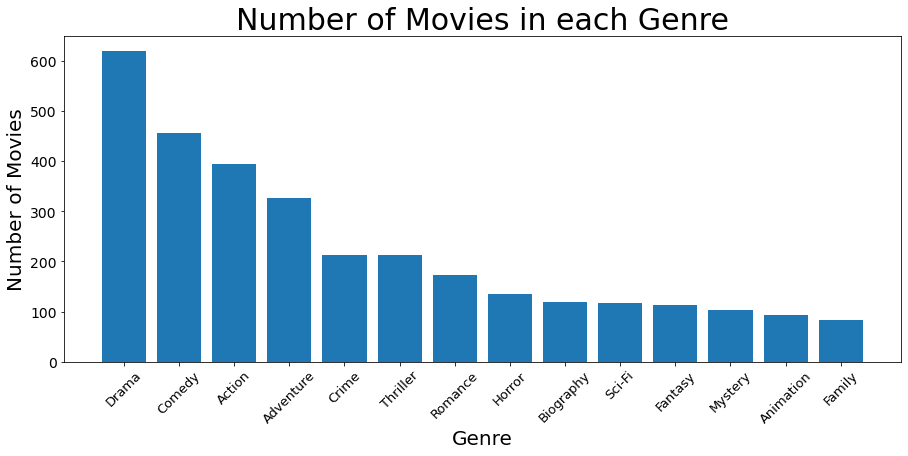

In [136]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=f_t_genres,height=f_t_num)
plt.xticks(rotation=45,size = 13)
plt.title('Number of Movies in each Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 20)
plt.yticks(size = 14);

In [15]:
f_t_count_in_order = final_table_genres.groupby('genres').count()
f_t_count_in_order = f_t_count_in_order.loc[f_t_count_in_order['id'] > 50]
f_t_count_in_order

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,popularity,vote_average,vote_count
genres,,,,,,,,,,,,,,
Action,395,395,395,395,395,395,395,395,395,395,395,395,395,395
Adventure,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Animation,94,94,94,94,94,94,94,94,94,94,94,94,94,94
Biography,120,120,120,120,120,120,120,120,120,120,120,120,120,120
Comedy,457,457,457,457,457,457,457,457,457,457,457,457,457,457
Crime,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Drama,620,620,620,620,620,620,620,620,620,620,620,620,620,620
Family,84,84,84,84,84,84,84,84,84,84,84,84,84,84
Fantasy,113,113,113,113,113,113,113,113,113,113,113,113,113,113


In [16]:
num_of_movies_per_genre = list(f_t_count_in_order['id'].values)
num_of_movies_per_genre

[395, 326, 94, 120, 457, 212, 620, 84, 113, 135, 104, 174, 118, 212]

In [17]:
roi_genre_order_table = final_table_genres.groupby('genres').sum()
roi_genre_order_table = roi_genre_order_table.loc[(roi_genre_order_table.index == 'Drama') | 
                          (roi_genre_order_table.index == 'Comedy') |
                         (roi_genre_order_table.index == 'Action') |
                         (roi_genre_order_table.index == 'Adventure') |
                         (roi_genre_order_table.index == 'Thriller') |
                         (roi_genre_order_table.index == 'Crime') |
                         (roi_genre_order_table.index == 'Romance') |
                         (roi_genre_order_table.index == 'Horror') |
                         (roi_genre_order_table.index == 'Biography') |
                         (roi_genre_order_table.index == 'Sci-Fi') |
                         (roi_genre_order_table.index == 'Fantasy') |
                         (roi_genre_order_table.index == 'Mystery') |
                         (roi_genre_order_table.index == 'Animation') |
                         (roi_genre_order_table.index == 'Family')]

In [74]:
genres_lst = ['Comedy', 'Drama', 'Action', 'Adventure']

g = final_table_genres.groupby('genres').mean()
g.loc[g.index.isin(genres_lst)]

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
genres,,,,,,,,,,
Action,762.997468,50.721519,8.600228e+07,2.642648e+08,277.795037,2013.898734,113.101266,17.832466,6.261013,3654.817722
Adventure,676.901840,47.809816,1.094877e+08,3.670441e+08,322.021433,2014.039877,111.699387,18.628626,6.366258,4220.644172
Comedy,701.131291,49.781182,4.429573e+07,1.492688e+08,338.310022,2013.597374,102.822757,12.637790,6.239606,1873.875274
Drama,781.385484,51.177419,2.970426e+07,8.281619e+07,340.912364,2013.800000,112.635484,12.062642,6.556774,1769.267742


In [18]:
roi_genre_order_table

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
genres,,,,,,,,,,
Action,301384,20035,33970900000,104384601134,109729.039619,795490,44675.0,7043.824,2473.1,1443653
Adventure,220670,15586,35693000000,119656362813,104978.987177,656577,36414.0,6072.932,2075.4,1375930
Animation,53612,4210,9560000000,37789331264,36983.840251,189329,8977.0,1553.274,614.3,291399
Biography,92671,6134,3273270000,10204442637,41311.307667,241762,14294.0,1482.667,829.4,215118
Comedy,320417,22750,20243150000,68215823682,154607.680162,920214,46990.0,5775.470,2851.5,856361
Crime,182304,10479,7339820000,18952840831,49357.982989,426949,23308.0,2888.528,1338.2,399559
Drama,484459,31730,18416642650,51346040737,211365.665877,1248556,69834.0,7478.838,4065.2,1096946
Family,65788,4434,5877900000,17290057931,23867.482186,169106,8881.0,1117.280,520.8,172765
Fantasy,85667,5787,10107650000,28665014243,37331.751939,227547,12597.0,1929.996,691.7,379539


In [19]:
list_of_total_roi_per_genre = list(roi_genre_order_table['ROI'].values)
list_of_total_roi_per_genre

[109729.03961852108,
 104978.98717698823,
 36983.84025090016,
 41311.307666989844,
 154607.6801616492,
 49357.982988940006,
 211365.66587697229,
 23867.48218634462,
 37331.75193867503,
 88749.57523165588,
 66284.54094313303,
 66430.0634841919,
 46290.001876005874,
 105331.86481982713]

In [20]:
avg_roi_per_genre = [i / j for i, j in zip(list_of_total_roi_per_genre, num_of_movies_per_genre)]
avg_roi_per_genre

[277.79503700891416,
 322.0214330582461,
 393.4451090521294,
 344.26089722491537,
 338.31002223555623,
 232.8206744761321,
 340.9123643176972,
 284.1366926945788,
 330.36948618296486,
 657.4042609752287,
 637.351355222433,
 381.78197404707987,
 392.2881514915752,
 496.8484189614487]

In [21]:
genres_Alpha_order = list(roi_genre_order_table.index)
genres_Alpha_order

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller']

In [90]:
x = list(dict(sorted(dict(zip(genres_Alpha_order, avg_roi_per_genre)).items()
                     , key=lambda x: x[1], reverse=True)).keys())
y = list(dict(sorted(dict(zip(genres_Alpha_order, avg_roi_per_genre)).items()
                     , key=lambda x: x[1], reverse=True)).values())

In [88]:
x

['Horror',
 'Mystery',
 'Thriller',
 'Animation',
 'Sci-Fi',
 'Romance',
 'Biography',
 'Drama',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Family',
 'Action',
 'Crime']

In [91]:
y

[657.4042609752287,
 637.351355222433,
 496.8484189614487,
 393.4451090521294,
 392.2881514915752,
 381.78197404707987,
 344.26089722491537,
 340.9123643176972,
 338.31002223555623,
 330.36948618296486,
 322.0214330582461,
 284.1366926945788,
 277.79503700891416,
 232.8206744761321]

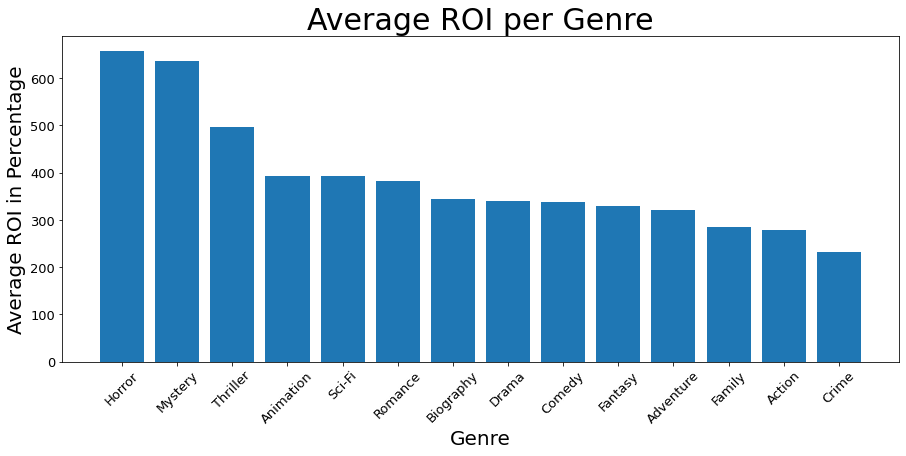

In [140]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=x,height=y)
plt.title('Average ROI per Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Average ROI in Percentage', fontsize = 20)
plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13);

In [23]:
final_table_genres.loc[final_table_genres['genres'] == 'Horror'].describe()

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
count,135.000000,135.000000,1.350000e+02,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,639.474074,51.333333,2.254407e+07,8.149852e+07,657.404261,2014.133333,99.081481,12.419156,5.799259,1619.622222
std,494.752642,27.627317,3.144536e+07,1.063753e+08,884.366697,2.605391,12.302197,5.395764,0.717219,1658.756101
min,7.000000,1.000000,6.500000e+05,7.095800e+04,0.215024,2010.000000,80.000000,0.667000,3.600000,23.000000
25%,155.500000,28.000000,5.000000e+06,1.472403e+07,104.186527,2012.000000,91.000000,8.971500,5.300000,560.000000
50%,579.000000,54.000000,1.060000e+07,5.172364e+07,297.489166,2014.000000,96.000000,11.302000,5.900000,1061.000000
75%,1125.500000,74.500000,2.700000e+07,9.980374e+07,773.389970,2016.000000,106.000000,14.468000,6.200000,2120.500000
max,1477.000000,100.000000,1.900000e+08,6.974580e+08,4140.796880,2018.000000,152.000000,31.397000,7.500000,10931.000000


In [24]:
final_table_genres.describe()

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
count,3315.000000,3315.000000,3.315000e+03,3.315000e+03,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,729.087481,50.748416,5.401966e+07,1.741834e+08,358.378421,2013.814480,109.488989,14.300364,6.359578,2507.392459
std,413.824794,28.447127,5.921720e+07,2.551378e+08,436.968874,2.562373,16.591659,8.168129,0.781385,3056.385936
min,7.000000,1.000000,5.000000e+04,5.969600e+04,0.215024,2010.000000,79.000000,0.600000,2.600000,2.000000
25%,369.000000,26.000000,1.300000e+07,2.219740e+07,119.499087,2012.000000,97.000000,9.064000,5.900000,528.500000
50%,736.000000,51.000000,3.100000e+07,7.589810e+07,241.125083,2014.000000,107.000000,12.389000,6.300000,1337.000000
75%,1080.000000,75.000000,7.000000e+07,2.094614e+08,422.261705,2016.000000,119.000000,16.982000,6.900000,3330.000000
max,1477.000000,100.000000,4.106000e+08,2.048134e+09,4140.796880,2018.000000,180.000000,80.773000,8.400000,22186.000000


In [25]:
list_of_total_worldwide_gross_per_genre = list(roi_genre_order_table['worldwide_gross'].values)
list_of_total_worldwide_gross_per_genre

[104384601134,
 119656362813,
 37789331264,
 10204442637,
 68215823682,
 18952840831,
 51346040737,
 17290057931,
 28665014243,
 11002300843,
 10548382224,
 13277093850,
 44150543604,
 28573182034]

In [26]:
list_of_total_production_budget_per_genre = list(roi_genre_order_table['production_budget'].values)
list_of_total_production_budget_per_genre

[33970900000,
 35693000000,
 9560000000,
 3273270000,
 20243150000,
 7339820000,
 18416642650,
 5877900000,
 10107650000,
 3043450000,
 2940187650,
 4220365000,
 11828075000,
 8137937650]

In [27]:
total_profit_per_genre = [i - j for i, j 
                    in zip(list_of_total_worldwide_gross_per_genre,list_of_total_production_budget_per_genre )]
avg_profit_per_genre = [i / j for i, j 
                    in zip(total_profit_per_genre,num_of_movies_per_genre )]

In [94]:
x_2 = list(dict(sorted(dict(zip(genres_Alpha_order,avg_profit_per_genre )).items()
                     , key=lambda x: x[1], reverse=True)).keys())
y_2 = list(dict(sorted(dict(zip(genres_Alpha_order,avg_profit_per_genre )).items()
                     , key=lambda x: x[1], reverse=True)).values())

In [96]:
x_2

['Animation',
 'Sci-Fi',
 'Adventure',
 'Action',
 'Fantasy',
 'Family',
 'Comedy',
 'Thriller',
 'Mystery',
 'Horror',
 'Biography',
 'Crime',
 'Drama',
 'Romance']

In [97]:
y_2

[300312034.7234042,
 273919225.4576271,
 257556327.64723927,
 178262534.5164557,
 164224462.32743362,
 135859022.98809522,
 104973027.75054705,
 96392662.18867925,
 73155717.0576923,
 58954450.68888889,
 57759771.975,
 54778400.14622641,
 53111932.3983871,
 52050165.8045977]

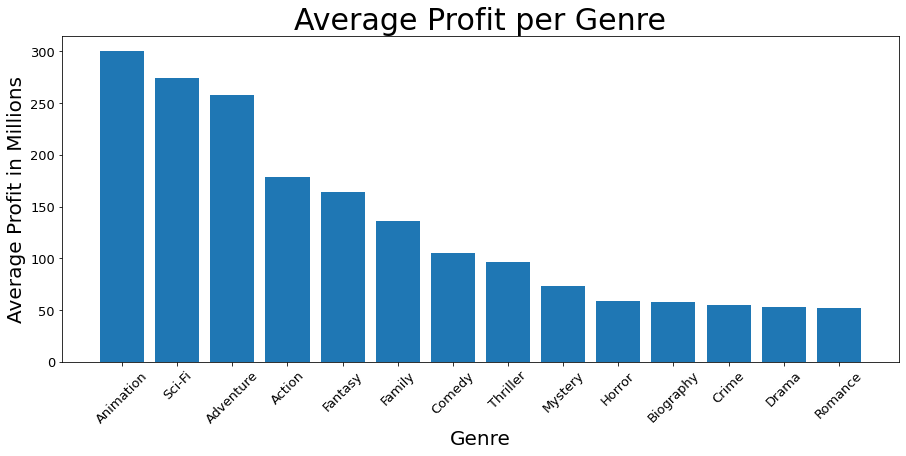

In [143]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=x_2,height=[number/1000000 for number in y_2])
plt.title('Average Profit per Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Average Profit in Millions', fontsize = 20)
plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13);

In [29]:
list_of_total_popularity_per_genre = list(roi_genre_order_table['popularity'].values)
list_of_total_popularity_per_genre

[7043.823999999995,
 6072.931999999997,
 1553.2740000000006,
 1482.667000000001,
 5775.4699999999975,
 2888.5280000000007,
 7478.837999999998,
 1117.2800000000002,
 1929.9959999999987,
 1676.586,
 1452.3689999999997,
 1860.4509999999998,
 2436.5079999999994,
 2989.944]

In [30]:
avg_popularity_per_genre = [i / j for i, j in zip(list_of_total_popularity_per_genre, num_of_movies_per_genre)]
avg_popularity_per_genre

[17.832465822784798,
 18.628625766871156,
 16.52419148936171,
 12.355558333333342,
 12.63778993435448,
 13.6251320754717,
 12.062641935483867,
 13.300952380952383,
 17.079610619469015,
 12.419155555555555,
 13.965086538461536,
 10.692247126436781,
 20.648372881355925,
 14.103509433962264]

In [99]:
x_3 = list(dict(sorted(dict(zip(genres_Alpha_order,avg_popularity_per_genre )).items()
                     , key=lambda x: x[1], reverse=True)).keys())
y_3 = list(dict(sorted(dict(zip(genres_Alpha_order,avg_popularity_per_genre )).items()
                     , key=lambda x: x[1], reverse=True)).values())

In [100]:
x_3

['Sci-Fi',
 'Adventure',
 'Action',
 'Fantasy',
 'Animation',
 'Thriller',
 'Mystery',
 'Crime',
 'Family',
 'Comedy',
 'Horror',
 'Biography',
 'Drama',
 'Romance']

In [101]:
y_3

[20.648372881355925,
 18.628625766871156,
 17.832465822784798,
 17.079610619469015,
 16.52419148936171,
 14.103509433962264,
 13.965086538461536,
 13.6251320754717,
 13.300952380952383,
 12.63778993435448,
 12.419155555555555,
 12.355558333333342,
 12.062641935483867,
 10.692247126436781]

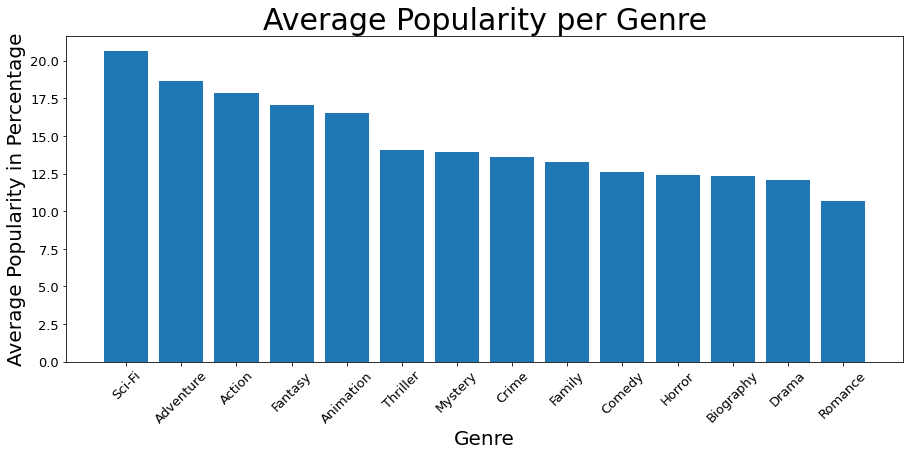

In [145]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=x_3,height= y_3)
plt.title('Average Popularity per Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Average Popularity in Percentage', fontsize = 20)
plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13);

# Working on popularity data

In [32]:
final_table

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,"Horror,Mystery,Thriller",9.669,5.9,1197
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller",13.989,5.6,3357
2,9,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller",9.350,5.6,519
3,10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller",24.364,6.2,4797
4,11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery",12.408,6.3,2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1462,79,2012-11-02,vamps,16000000,"$3,361",94812,0.592575,2012,tt1545106,92.0,"Comedy,Horror,Romance",6.650,5.0,145
1262,1463,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama",6.185,6.1,28
1263,1467,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror",8.627,5.8,151
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance",6.487,4.0,172


In [33]:
final_table['popularity'].describe()

count    1266.000000
mean       13.838359
std         7.963574
min         0.600000
25%         8.881000
50%        12.080500
75%        16.479000
max        80.773000
Name: popularity, dtype: float64

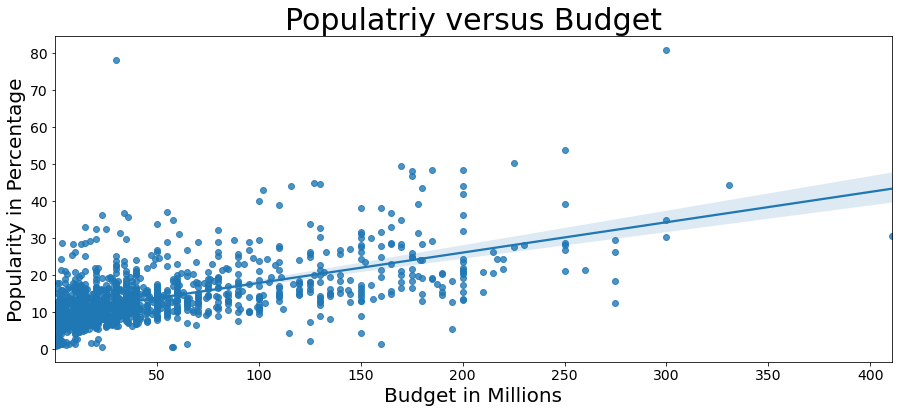

In [135]:
fig, ax = plt.subplots(figsize = (15,6))
sns.regplot(data=final_table,x=[number/1000000 for number in final_table['production_budget']],
            y=final_table['popularity'])
plt.title('Populatriy versus Budget', fontsize = 30)
plt.xlabel('Budget in Millions', fontsize = 20)
plt.ylabel('Popularity in Percentage', fontsize = 20)
ax.ticklabel_format(useOffset=False, style = 'plain')
plt.xticks(size = 14)
plt.yticks(size = 14);

In [35]:
final_table.loc[final_table['popularity'] > 50]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count
150,182,7,2018-04-27,avengers:infinitywar,300000000,"$678,815,482",2048134200,682.711400,2018,tt4154756,149.0,"Action,Adventure,Sci-Fi",80.773,8.3,13948
156,188,27,2012-05-04,theavengers,225000000,"$623,279,547",1517935897,674.638176,2012,tt0848228,143.0,"Action,Adventure,Sci-Fi",50.289,7.6,19673
382,452,22,2014-12-17,thehobbit:thebattleofthefivearmies,250000000,"$255,119,788",945577621,378.231048,2014,tt2310332,144.0,"Adventure,Fantasy",53.783,7.3,8392
600,698,6,2014-10-24,johnwick,30000000,"$43,037,835",76235001,254.116670,2014,tt2911666,101.0,"Action,Crime,Thriller",78.123,7.2,10081


In [36]:
final_table.loc[final_table['production_budget'] > 400000000]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count
598,696,2,2011-05-20,piratesofthecaribbean:onstrangertides,410600000,"$241,063,875",1045663875,254.667286,2011,tt1298650,136.0,"Action,Adventure,Fantasy",30.579,6.4,8571


In [37]:
final_table

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,"Horror,Mystery,Thriller",9.669,5.9,1197
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller",13.989,5.6,3357
2,9,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller",9.350,5.6,519
3,10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller",24.364,6.2,4797
4,11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery",12.408,6.3,2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1462,79,2012-11-02,vamps,16000000,"$3,361",94812,0.592575,2012,tt1545106,92.0,"Comedy,Horror,Romance",6.650,5.0,145
1262,1463,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama",6.185,6.1,28
1263,1467,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror",8.627,5.8,151
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance",6.487,4.0,172


In [38]:
final_table['release_month'] = pd.DatetimeIndex(final_table['release_date']).month

In [39]:
final_table

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count,release_month
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,"Horror,Mystery,Thriller",9.669,5.9,1197,10
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller",13.989,5.6,3357,10
2,9,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller",9.350,5.6,519,8
3,10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller",24.364,6.2,4797,6
4,11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery",12.408,6.3,2220,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1462,79,2012-11-02,vamps,16000000,"$3,361",94812,0.592575,2012,tt1545106,92.0,"Comedy,Horror,Romance",6.650,5.0,145,11
1262,1463,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama",6.185,6.1,28,6
1263,1467,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror",8.627,5.8,151,11
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance",6.487,4.0,172,3


In [50]:
final_table.groupby('release_month').count().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='release_month')

In [40]:
num_of_movies_per_month = list(final_table.groupby('release_month').count()['id'].values)
num_of_movies_per_month

[60, 82, 105, 82, 80, 108, 108, 112, 126, 145, 129, 129]

In [41]:
month_table = final_table.groupby('release_month').sum()
month_table

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
release_month,,,,,,,,,,
1,42453,2974,2152400000,5193957947,22861.790599,120830,6193.0,742.308,343.7,79873
2,55927,4593,3698470000,11804677616,28824.153487,165122,8898.0,1099.588,503.2,186153
3,81697,5126,6357100000,17763782456,31072.210383,211473,11285.0,1427.901,657.9,269195
4,57979,4007,3665700000,14138222363,28557.244855,165126,8769.0,1034.147,515.6,147967
5,56108,4096,7259850000,23303355909,25885.803424,161096,8921.0,1398.654,503.9,312255
6,74931,5605,7276250000,27316944624,44406.529113,217513,11754.0,1537.587,692.9,314854
7,67023,5419,6679700000,23388135380,51040.543360,217488,11620.0,1598.728,681.4,321844
8,86314,6020,4290120000,11350935266,37820.141189,225517,11779.0,1438.080,701.1,200931
9,100147,6116,3668577650,9784841730,37592.220276,253710,13509.0,1550.282,802.5,205138


In [42]:
total_gross_per_month = list(month_table['worldwide_gross'].values)
total_gross_per_month

[5193957947,
 11804677616,
 17763782456,
 14138222363,
 23303355909,
 27316944624,
 23388135380,
 11350935266,
 9784841730,
 12435610112,
 26172141330,
 21955393129]

In [43]:
total_budget_per_month = list(month_table['production_budget'].values)
total_budget_per_month

[2152400000,
 3698470000,
 6357100000,
 3665700000,
 7259850000,
 7276250000,
 6679700000,
 4290120000,
 3668577650,
 4176300000,
 7672200000,
 6788100000]

In [44]:
total_profit_per_month = [i - j for i, j 
                    in zip(total_gross_per_month,total_budget_per_month )]
avg_profit_per_month = [i / j for i, j 
                    in zip(total_profit_per_month,num_of_movies_per_month )]

In [45]:
avg_profit_per_month

[50692632.45,
 98856190.43902439,
 108635071.00952381,
 127713687.35365854,
 200543823.8625,
 185561987.25925925,
 154707735.0,
 63042993.446428575,
 48541778.41269841,
 56960759.39310345,
 143410397.90697673,
 117575915.72868218]

In [104]:
months_name_list = ['January','Feburary','March','April','May','June','July','August',
                    'September','October','November','December']

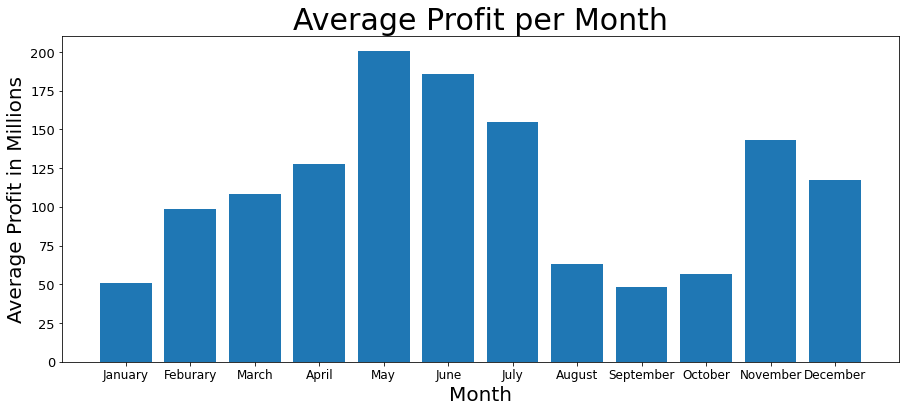

In [151]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=list(final_table.groupby('release_month').count().index),
       height=[number/1000000 for number in avg_profit_per_month])
plt.title('Average Profit per Month', fontsize = 30)
plt.xticks(list(final_table.groupby('release_month').count().index),months_name_list, size = 12)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Average Profit in Millions', fontsize = 20)
plt.yticks(size = 13);